<a href="https://colab.research.google.com/github/21PA1A6109/spam-mail-classification/blob/main/spam_mail_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
import re
import string
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [57]:

df= pd.read_csv('/content/drive/MyDrive/DWM/spam.csv',encoding='latin-1')

In [58]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [60]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [62]:
df.rename(columns = {'v1': 'target', 'v2':'Email'},inplace =True)

In [63]:
df.head()

,target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
df.shape

(5572, 2)

In [65]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
target,0,0.0
Email,0,0.0


In [66]:
df.duplicated().sum()

403

In [67]:
df.drop_duplicates(keep='first')

,target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [68]:
df.shape

(5572, 2)

In [69]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

<ipython-input-70-a54cb767e843>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='rainbow')


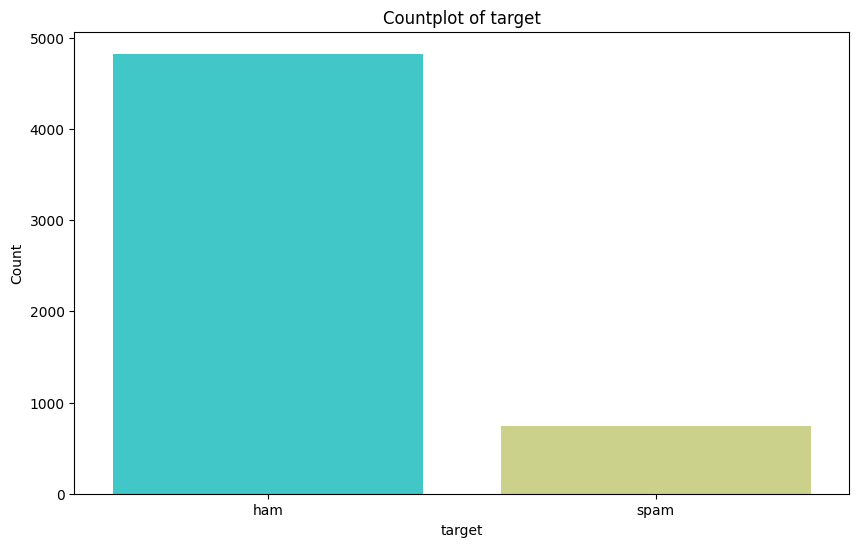

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df, palette='rainbow')
plt.title('Countplot of target')
plt.xlabel('target')
plt.ylabel('Count')
plt.show()

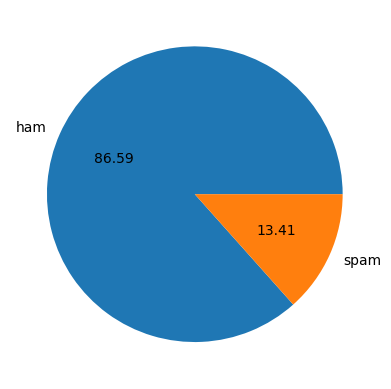

In [71]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [72]:
df['Number_of_char'] = df['Email'].apply(len)

In [73]:
df.head()

,target,Email,Number_of_char
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


**2. count number of words for each email**

In [74]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
df['number_of_words'] = df['Email'].apply(lambda x : len( nltk.word_tokenize(x)))

In [76]:
df.head()

,target,Email,Number_of_char,number_of_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [77]:
df['number_of_sent'] = df['Email'].apply(lambda x : len( nltk.sent_tokenize(x)))

In [78]:
df.head()

,target,Email,Number_of_char,number_of_words,number_of_sent
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [79]:
df[['Number_of_char', 'number_of_words', 'number_of_sent']]

,Number_of_char,number_of_words,number_of_sent
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,161,35,4
5568,37,9,1
5569,57,15,2
5570,125,27,1


In [80]:
# statistical summary of the data
df[['Number_of_char', 'number_of_words', 'number_of_sent']].describe()

,Number_of_char,number_of_words,number_of_sent
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [81]:
# Observation regarding ham mails
df[df['target'] == 0] [['Number_of_char', 'number_of_words', 'number_of_sent']].describe()

,Number_of_char,number_of_words,number_of_sent
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [82]:
df[df['target'] == 1] [['Number_of_char', 'number_of_words', 'number_of_sent']].describe()

,Number_of_char,number_of_words,number_of_sent
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [83]:
le = LabelEncoder() # calling LabelEncoder
df['target'] = le.fit_transform(df['target']) # fitting the data into LabelEncoder
df.head()

,target,Email,Number_of_char,number_of_words,number_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


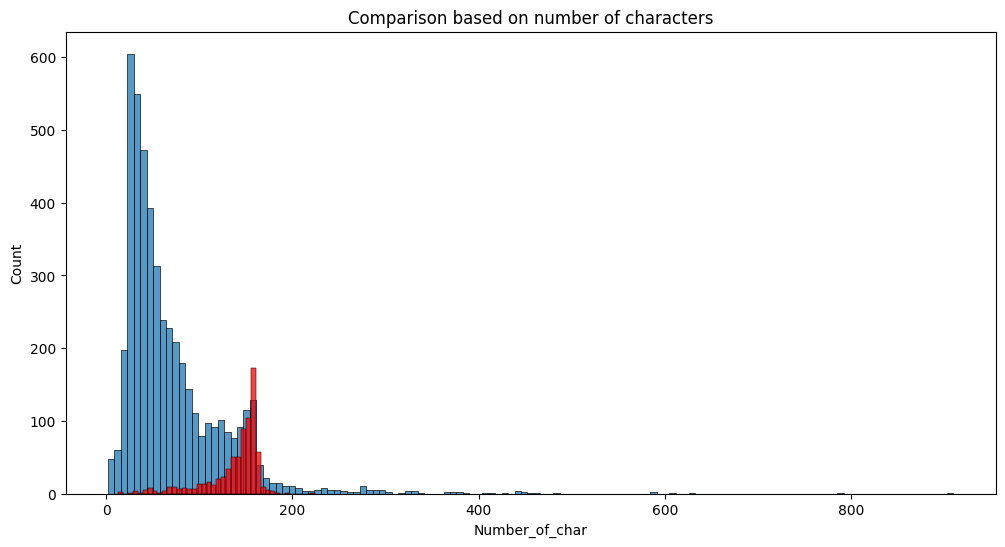

In [84]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['Number_of_char']) # for ham
sns.histplot(df[df['target'] == 1]['Number_of_char'], color = 'red') # for spam
plt.title('Comparison based on number of characters')
plt.show()

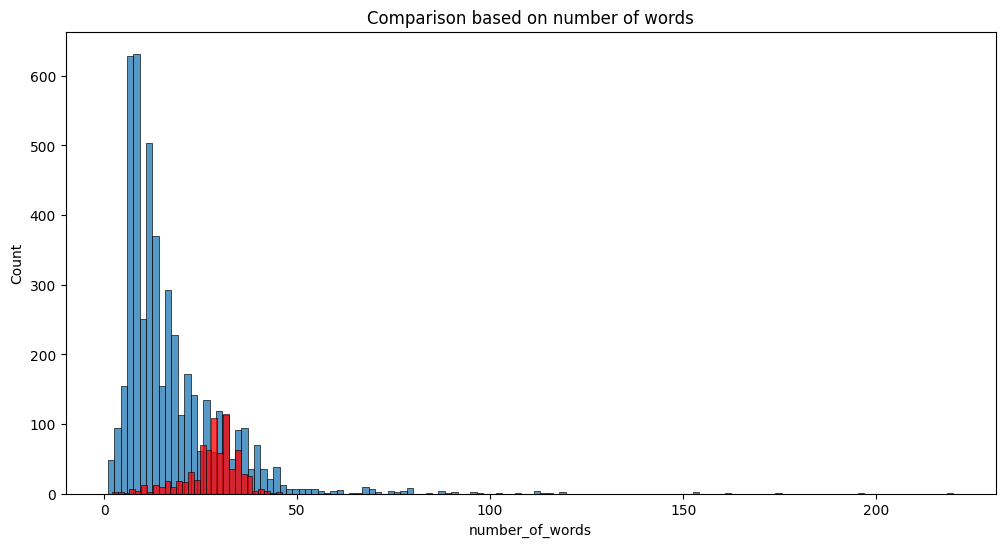

In [85]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['number_of_words']) # for ham
sns.histplot(df[df['target'] == 1]['number_of_words'], color = 'red') # for spam
plt.title('Comparison based on number of words')
plt.show()

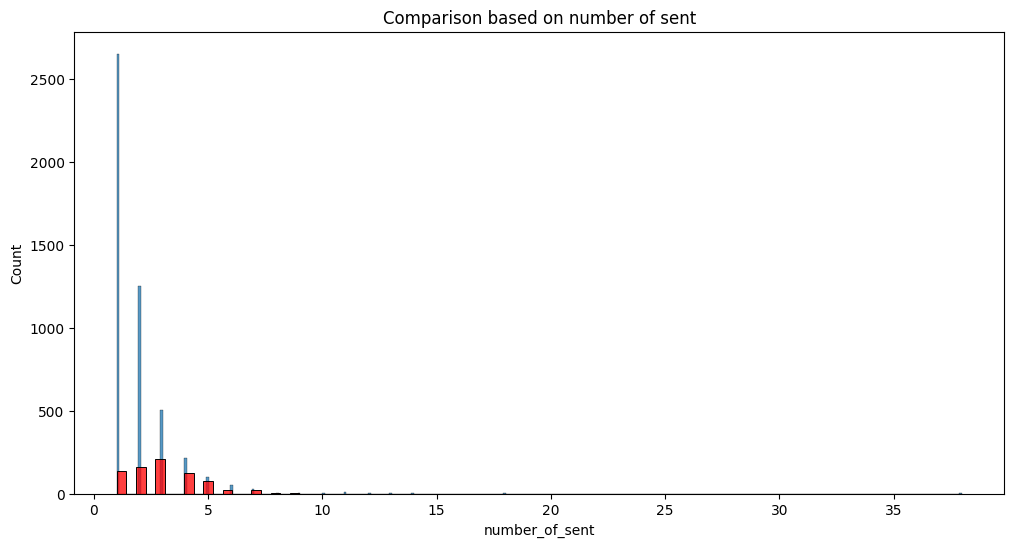

In [86]:
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target'] == 0]['number_of_sent']) # for ham
sns.histplot(df[df['target'] == 1]['number_of_sent'], color = 'red') # for spam
plt.title('Comparison based on number of sent')
plt.show()

In [87]:
# calling the PorterStemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)

In [88]:
import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd

# calling the PorterStemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()

    # Tokenization using NLTK
    text = nltk.word_tokenize(text)

    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    # Removing stop words and punctuation
    text = y[:]
    y.clear()

    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # Join the processed tokens back into a single string
    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [89]:
# applying function on the text column
df['new_text'] = df['Email'].apply(transform_text)
df.head()

,target,Email,Number_of_char,number_of_words,number_of_sent,new_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [90]:
df.columns

Index(['target', 'Email', 'Number_of_char', 'number_of_words',
       'number_of_sent', 'new_text'],
      dtype='object')

In [91]:
from wordcloud import WordCloud
def create_wordcloud(new_text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(new_text)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


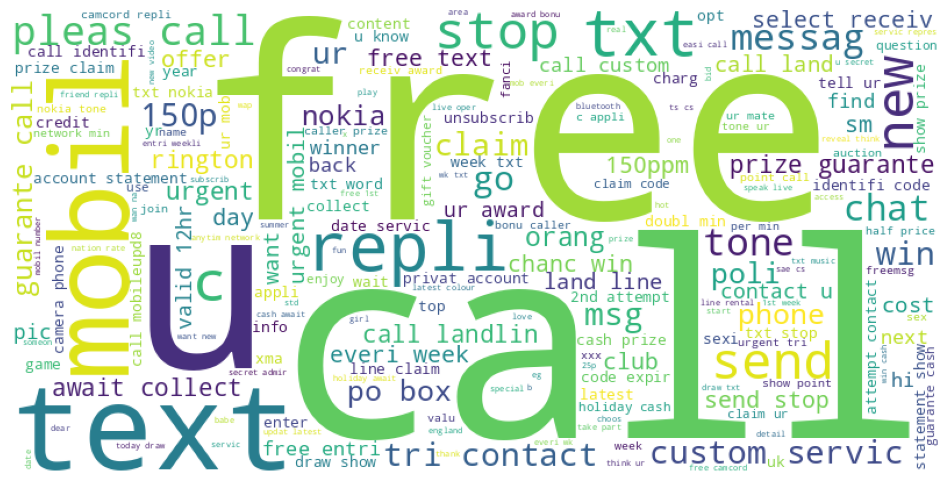

In [92]:
# Generate word cloud for ham (target == 1)
real = ' '.join(df[df['target'] == 1]['new_text'])
create_wordcloud(real)

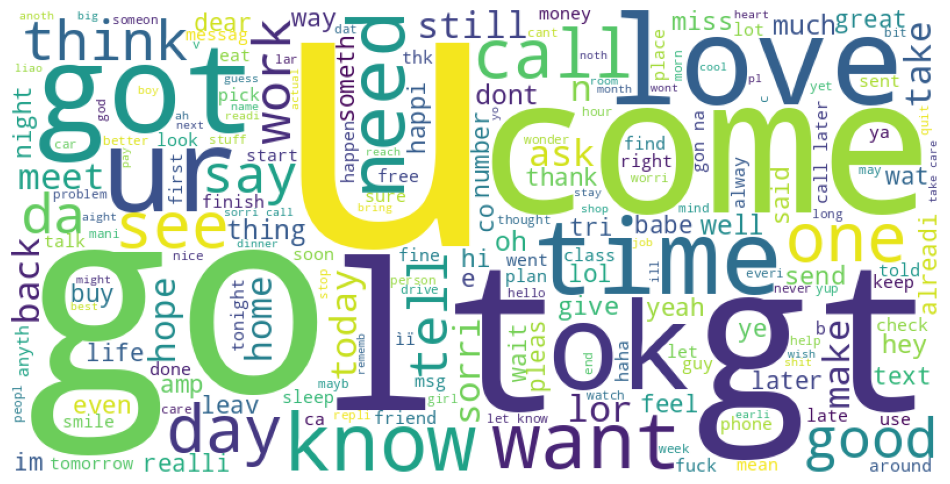

In [93]:
# Generate word cloud for ham (target == 0)
fake = ' '.join(df[df['target'] == 0]['new_text'])
create_wordcloud(fake)

## Model Building

In [94]:
tfidf = TfidfVectorizer()

# Transform the messages into a bag-of-words representation
X = tfidf.fit_transform(df['new_text']).toarray()
# Get the labels
y = df['target'].values  # Ensure y is a 1D array

In [95]:
X.shape

(5572, 6708)

In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [98]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [99]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8600896860986547
[[826 139]
 [ 17 133]]
0.4889705882352941


In [100]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9632286995515695
[[965   0]
 [ 41 109]]
1.0


In [101]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.967713004484305
[[961   4]
 [ 32 118]]
0.9672131147540983


In [102]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [103]:
# Make predictions on the test set with SVM
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print("SVM Classifier:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

SVM Classifier:
Accuracy: 0.9775784753363229
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

